pascalvoc: resize original images

Strategy:
1. Read: Images RGB / Masks RGB (original dataset)
2. Pad
3. Save: Images RGB / Masks RGB

In [53]:
padsize = (512,512)

(512, 512)

environment

In [54]:
using Pkg
envpath = expanduser("~/envs/d11/")
Pkg.activate(envpath)

  Activating project at `~/envs/d11`


In [55]:
# libs
using Images
using DataFrames
using CSV
using FLoops
using MLUtils: splitobs, randobs
using Random

In [56]:
# private libs
using PreprocessingImages; p=PreprocessingImages

PreprocessingImages

In [57]:
# output folders
workpath = pwd() * "/"
workpath = replace(workpath, homedir() => "~")

resizedTrainsetPath = workpath * "images/resized/train/"
resizedValidsetPath = workpath * "images/resized/valid/"
resizedTestsetPath  = workpath * "images/resized/test/"
mkpath(expanduser(resizedTrainsetPath))
mkpath(expanduser(resizedValidsetPath))
mkpath(expanduser(resizedTestsetPath))

"/home/ciro/projects/regularization/dataset/images/resized/test"

input dataset

In [58]:
fpfn = expanduser(workpath) * "dftrain.csv"
dftrain = CSV.read(fpfn, DataFrame)
dftrain = dftrain[dftrain.segmented, :]

fpfn = expanduser(workpath) * "dfvalid.csv"
dfvalid = CSV.read(fpfn, DataFrame)
dfvalid = dfvalid[dfvalid.segmented, :]

fpfn = expanduser(workpath) * "dftest.csv"
dftest = CSV.read(fpfn, DataFrame)
dftest = dftest[dftest.segmented, :];

size(dftrain), size(dfvalid), size(dftest)

((73, 4), (21, 4), (10, 4))

In [59]:
first(dftrain,3)

Row,X,y,label,segmented
,String,String?,Bool,Bool
1,../pascalvoc/VOCdevkit/VOC2012/JPEGImages/2009_002422.jpg,../pascalvoc/VOCdevkit/VOC2012/SegmentationClass/2009_002422.png,true,true
2,../pascalvoc/VOCdevkit/VOC2012/JPEGImages/2008_000073.jpg,../pascalvoc/VOCdevkit/VOC2012/SegmentationClass/2008_000073.png,true,true
3,../pascalvoc/VOCdevkit/VOC2012/JPEGImages/2009_003542.jpg,../pascalvoc/VOCdevkit/VOC2012/SegmentationClass/2009_003542.png,true,true


In [60]:
# create datasets with resized images
dftrain_resized = copy(dftrain)
dfvalid_resized = copy(dfvalid)
dftest_resized = copy(dftest);

In [61]:
@. dftrain_resized.X = resizedTrainsetPath * basename(dftrain_resized.X)
@. dfvalid_resized.X = resizedValidsetPath * basename(dfvalid_resized.X)
@. dftest_resized.X  = resizedTestsetPath * basename(dftest_resized.X)

@. dftrain_resized.y = resizedTrainsetPath * basename(dftrain_resized.y)
@. dfvalid_resized.y = resizedValidsetPath * basename(dfvalid_resized.y)
@. dftest_resized.y  = resizedTestsetPath * basename(dftest_resized.y)

first(dftrain_resized,3)

Row,X,y,label,segmented
,String,String,Bool,Bool
1,~/projects/regularization/dataset/images/resized/train/2009_002422.jpg,~/projects/regularization/dataset/images/resized/train/2009_002422.png,true,true
2,~/projects/regularization/dataset/images/resized/train/2008_000073.jpg,~/projects/regularization/dataset/images/resized/train/2008_000073.png,true,true
3,~/projects/regularization/dataset/images/resized/train/2009_003542.jpg,~/projects/regularization/dataset/images/resized/train/2009_003542.png,true,true


resize

In [62]:
dfs_in  = [dftrain, dfvalid, dftest]
dfs_out = [dftrain_resized, dfvalid_resized, dftest_resized]

# resize
for (df_in, df_out) in zip(dfs_in, dfs_out)
    N = size(df_in, 1)

    # images
    @floop for i in 1:N
        # resize all images
        local fpfn_in = expanduser(df_in.X[i])
        img = Images.load(fpfn_in)                       # read
        img = p.center_padview(img, padsize) .|> RGB     # pad
        local fpfn_out = expanduser(df_out.X[i])
        Images.save(fpfn_out, img)                       # save
    end

    # masks
    @floop for i in 1:N
        local fpfn_in = expanduser(df_in.y[i])
        img = Images.load(fpfn_in)                       # read
        img = p.center_padview(img, padsize) .|> Gray    # pad
        local fpfn_out = expanduser(df_out.y[i])
        Images.save(fpfn_out, img)                       # save
    end
end

In [63]:
size(dftrain_resized), size(dfvalid_resized), size(dftest_resized)

((73, 4), (21, 4), (10, 4))

In [64]:
# save dataframes
fpfn = expanduser(workpath) * "dftrain-resized.csv"
CSV.write(fpfn, dftrain_resized)
fpfn = expanduser(workpath) * "dfvalid-resized.csv"
CSV.write(fpfn, dfvalid_resized)
fpfn = expanduser(workpath) * "dftest-resized.csv"
CSV.write(fpfn, dftest_resized)

"/home/ciro/projects/regularization/dataset/dftest-resized.csv"

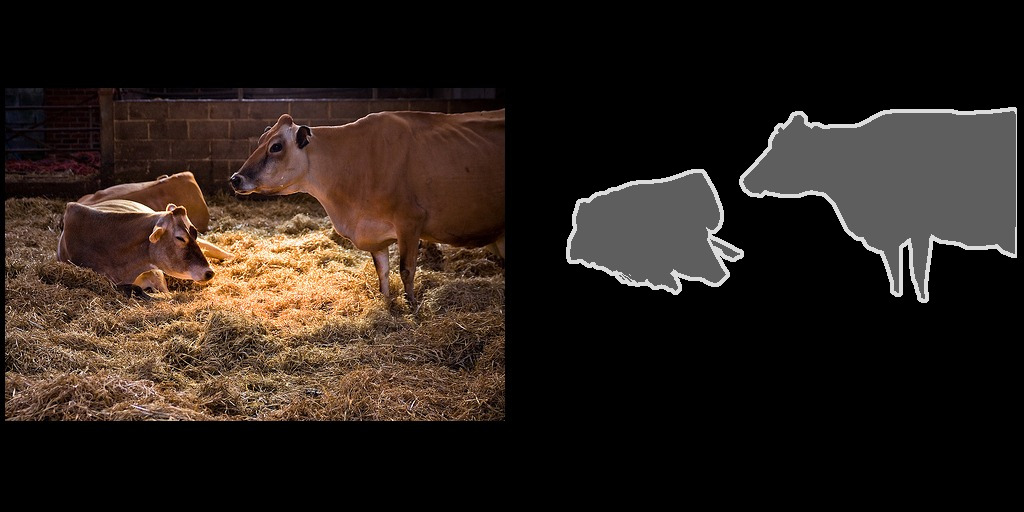

In [65]:
# checkpoint
df = CSV.read(expanduser(workpath) * "dftrain-resized.csv", DataFrame)
k = rand(1:size(df, 1))
img = Images.load(expanduser(df.X[k]))
mask = Images.load(expanduser(df.y[k]))
mosaicview([img, mask]; nrow=1)